In [24]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.combine import SMOTEENN
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier


In [25]:
df_train = pd.read_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/encoded_train.csv')
df_test = pd.read_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/encoded_test.csv')
df = pd.read_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/cleaned_train.csv')

In [26]:
df_train = df_train[["Job Level","Marital Status","Remote Work","Work-Life Balance","Gender","Number of Promotions","Company Reputation","Education Level","Number of Dependents","Overtime","Job Satisfaction","Distance from Home","Attrition"]]
df_test = df_test[["Job Level","Marital Status","Remote Work","Work-Life Balance","Gender","Number of Promotions","Company Reputation","Education Level","Number of Dependents","Overtime","Job Satisfaction","Distance from Home","Attrition"]] 

In [27]:
df_train["Attrition"].value_counts(normalize=True) * 100


Attrition
1    52.413327
0    47.586673
Name: proportion, dtype: float64

XGBClassifier

c:\Users\eslam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:48:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


validation Accuracy: 0.7501268391679351

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74      5628
           1       0.76      0.77      0.76      6198

    accuracy                           0.75     11826
   macro avg       0.75      0.75      0.75     11826
weighted avg       0.75      0.75      0.75     11826


Confusion Matrix:
 [[4126 1502]
 [1453 4745]]


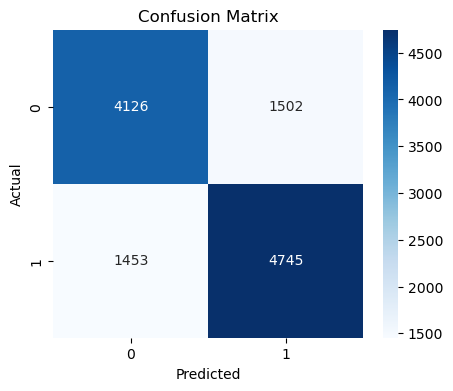

In [28]:
# Separate features and target
X= df_train[["Job Level","Marital Status","Remote Work","Work-Life Balance","Gender","Number of Promotions","Company Reputation","Education Level","Number of Dependents","Overtime","Job Satisfaction","Distance from Home"]]
y= df_train['Attrition']
X_test = df_test[["Job Level","Marital Status","Remote Work","Work-Life Balance","Gender","Number of Promotions","Company Reputation","Education Level","Number of Dependents","Overtime","Job Satisfaction","Distance from Home"]]
y_test = df_test["Attrition"]

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate on validation set
val_preds = xgb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_preds)
val_report = classification_report(y_val, val_preds)
cm = confusion_matrix(y_val, val_preds)

print("validation Accuracy:", val_accuracy)
print("\nClassification Report:\n", val_report)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

test Accuracy: 0.748993288590604

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74      7032
           1       0.77      0.76      0.76      7868

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900


Confusion Matrix:
 [[5209 1823]
 [1917 5951]]


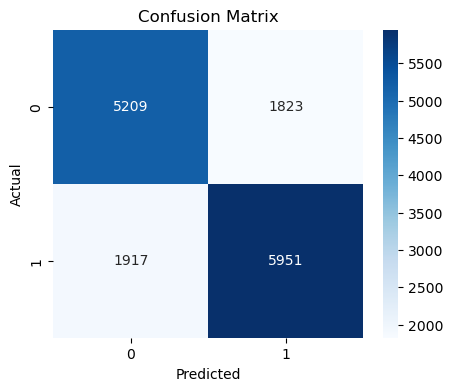

In [29]:
# Evaluate the model on the full test set
test_preds = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
test_report = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)

print("test Accuracy:", test_accuracy)
print("\nClassification Report:\n", test_report)
print("\nConfusion Matrix:\n", test_cm)

plt.figure(figsize=(5, 4))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

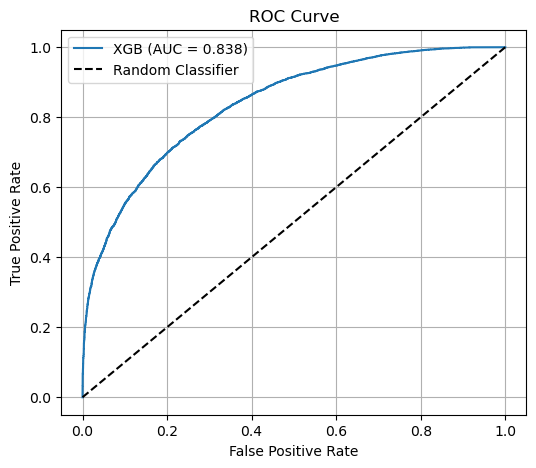

In [30]:
y_proba = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'XGB (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

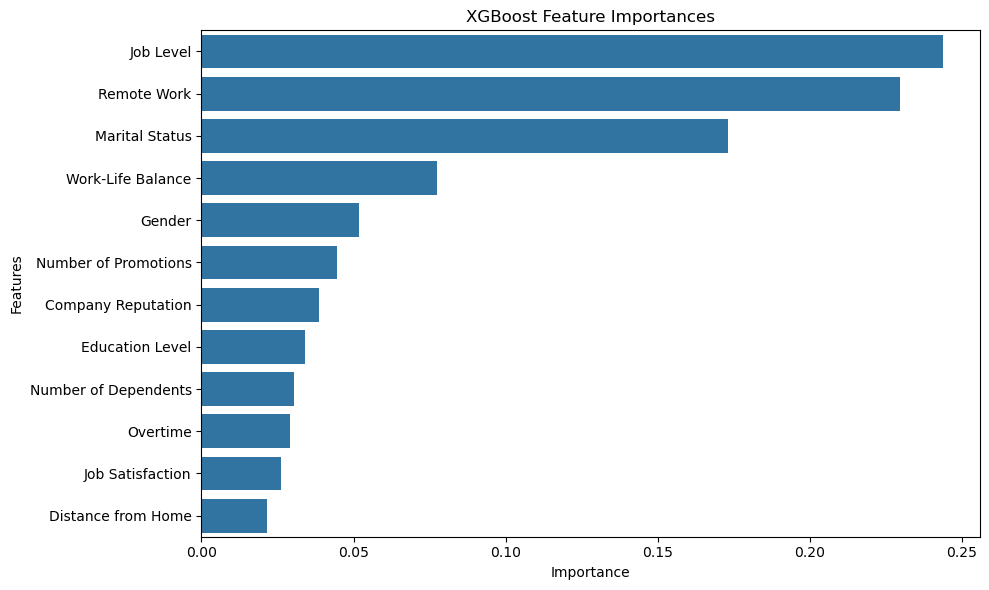

In [31]:
importances = xgb_model.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"])
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [32]:
import pickle

filename = "model.sav"
pickle.dump(xgb_model, open(filename, "wb"))

In [33]:
for col in df_train:
    print(col)
    print(df[col].unique())
    print(df_train[col].unique())
    print("\n")

Job Level
['Mid' 'Senior' 'Entry']
[1 2 0]


Marital Status
['Married' 'Divorced' 'Single']
[1 0 2]


Remote Work
['No' 'Yes']
[0 1]


Work-Life Balance
['Excellent' 'Poor' 'Good' 'Fair']
[0 3 2 1]


Gender
['Male' 'Female']
[1 0]


Number of Promotions
[2 3 0 1 4]
[2 3 0 1 4]


Company Reputation
['Excellent' 'Fair' 'Poor' 'Good']
[0 1 3 2]


Education Level
['Associate Degree' 'Master’s Degree' 'Bachelor’s Degree' 'High School'
 'PhD']
[0 3 1 2 4]


Number of Dependents
[0 3 2 4 1 5 6]
[0 3 2 4 1 5 6]


Overtime
['No' 'Yes']
[0 1]


Job Satisfaction
['Medium' 'High' 'Very High' 'Low']
[2 0 3 1]


Distance from Home
[22 21 11 27 71 37 75  5 39 57 51 26 78 30 98 48 17 86 60 10 18 95 23 16
 63 92 58 55 31 32 82  8 74  3 76 47 67 84 14 36 79 52 44 89 64  7 87 24
 15 81 13 35 68 56 73 41 34 29 19 50 62 49 69 33 61 53 72 91 65 93 28 46
 54  9 45 96 94  1 88 25  6 70 12 99  4 97 42 38 90 43 59 85  2 40 20 77
 83 80 66]
[22 21 11 27 71 37 75  5 39 57 51 26 78 30 98 48 17 86 60 10 18 95 23 16